In [37]:
from google.colab import files
uploaded = files.upload()

Saving Salary dataset.csv to Salary dataset.csv


In [38]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('Salary dataset.csv', delimiter=',', skip_header=1)
n = data.shape[0]
X = data[:, 1].reshape(n, 1)
X = np.hstack((np.ones((n, 1)), X))
y = data[:, -1]

In [39]:
def predict(X, theta):
  y_pred_list = []
  for x in X:
    y_pred = theta[1] * x + theta[0]
    y_pred_list.append(y_pred)
  reg = np.array(y_pred_list)
  return reg

In [40]:
def get_cost(X, y, theta):
    # calculate diff between model predictions and actual target values
    error = X.dot(theta) - y

    # calculate squared sum of the loss and scale it by 1/(2 * num of examples)
    cost = np.sum(error ** 2) / (2 * len(X))

    # return the computed cost as a measure of model fit
    return cost

In [41]:
# test get_cost() with theta = [0,0]
cost_for_theta_zero = get_cost(X, y, [0, 0])
print(cost_for_theta_zero) # expected result: approx. 3251553638

3251553638.866667


In [42]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # number of training examples
    J_history = []  # list to store cost values at each iteration

    for itr in range(num_iters):
        error = X.dot(theta) - y
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - alpha * gradient

        # add cost for the current theta values to the history list
        cost = get_cost(X, y, theta)
        J_history.append(cost)

    return (theta, J_history)

In [43]:
# initialize theta with 2 elements: intercept and slope
theta = np.zeros(2)

# train the model with fit_with_cost()
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

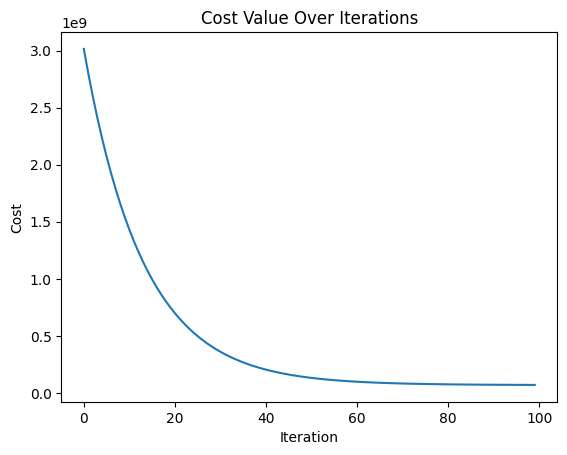

In [44]:
# visualize cost value over iterations
plt.plot(J_history)
plt.title("Cost Value Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [45]:
def display_salary(years_experience):
  predicted_salary = theta[0] + theta[1] * years_experience
  print(f"Predicted salary for {years_experience} years of experience {predicted_salary}")

display_salary(10)
display_salary(15)

Predicted salary for 10 years of experience 127134.91360616997
Predicted salary for 15 years of experience 189547.72611796323
